In [1]:
import pymks
import numpy as np
from PIL import Image
from Scripts import SpatialCorrelations as corr
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

### Changing the image from png/dat file to numpy array

In [ ]:
image_path ='/Users/adithyaiyer/Desktop/DDP/Datasets/TimeSeries/time_000072000.dat'
img_ = corr.dat_to_numpy(image_path)

image_path ='/Users/adithyaiyer/ac2d/time_000400.dat'
img_1 = corr.dat_to_numpy(image_path)


## Visualizing the microstructure(cropped if png)

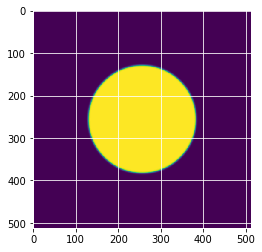

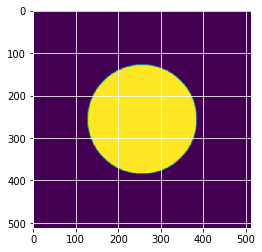

In [9]:
plt.imshow(img_)
plt.show()
plt.imshow(img_1)

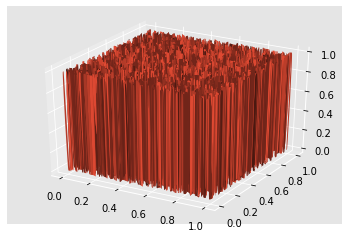

In [8]:
x = np.linspace(0, 1, 4096)
y = np.linspace(0, 1, 4096)
xv, yv = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
dem3d=ax.plot_surface(xv,yv,img_)
plt.show()

## Binarize array

In [10]:
img_binary = corr.binarize_image_dat(img_)
img_binary = img_binary.astype(np.double)
img_binary.shape

(1024, 1024)

# Correlation plots obtained by using PYMKS library

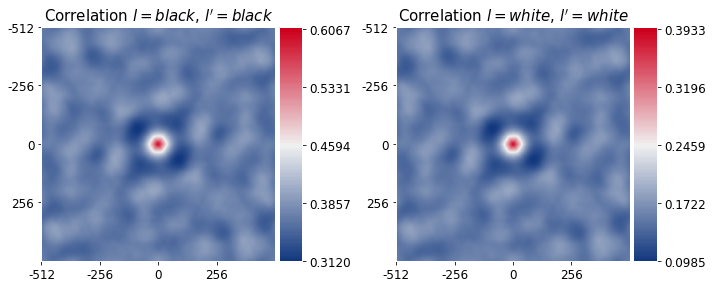

In [5]:
# Auto Correlation

auto_pymks =corr.auto_corr_from_pymks(img_binary)


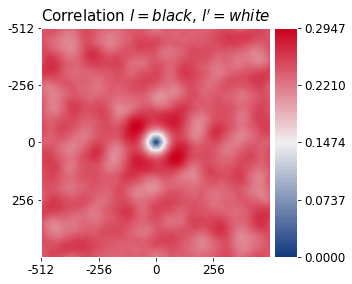

In [6]:
# Cross Correlation

cross_pymks =corr.cross_corr_from_pymks(img_binary)

# Plots obtained by self built CODE

white-white


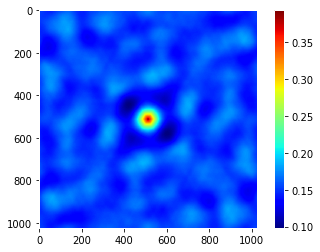

black-black


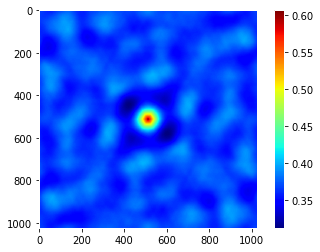

In [7]:
# AutoCorrelations

white_stats, black_stats = corr.auto_corr_from_code(img_binary)
print('white-white')
plt.imshow(white_stats, cmap='jet')
plt.colorbar()
plt.grid(b=None)
plt.show()

print('black-black')
plt.imshow(black_stats, cmap='jet')
plt.colorbar()
plt.grid(b=None)
plt.show()

black-white


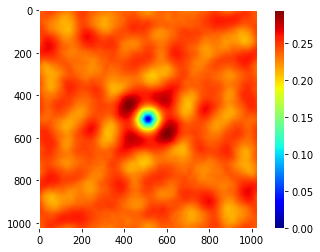

In [8]:
# Cross Correlations

cross = corr.cross_corr_from_code(img_binary)
print('black-white')
plt.imshow(cross, cmap='jet')
plt.colorbar()
plt.grid(b=None)
plt.show()

In [9]:
np.min(cross.flatten())

0.0

In [10]:
cross_flat = (cross[512])
cross_pymks_flat = (cross_pymks[0][512].flatten())

## Plotting 2 point stats accross all vectors

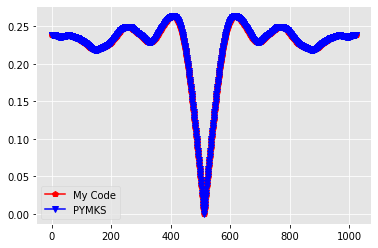

In [11]:
plt.plot(cross_pymks_flat,'r',marker = 'p')
plt.plot(cross_flat,'b',marker = 'v')
plt.legend(['My Code','PYMKS'])


## Showing close up view to verify that there is no deviation

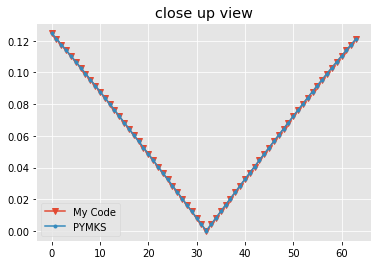

In [12]:
cross_flat = (cross[512])[480:544]
cross_pymks_flat = (cross_pymks[0][512].flatten())[480:544]
plt.plot(cross_pymks_flat,marker ='v')
plt.plot(cross_flat,marker ='.')
plt.title("close up view")
plt.legend(['My Code','PYMKS'])


# Radial Destribution Probability

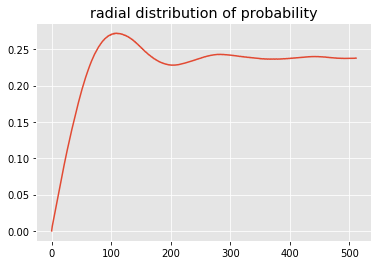

From outputs of my code


In [13]:
## From my code

r_val =corr.radialDistribution(cross)
plt.plot(r_val)
plt.title("radial distribution of probability")
plt.show()

reshaped_from_pymks = np.reshape(cross_pymks.flatten(),cross.shape)
print('From outputs of my code')

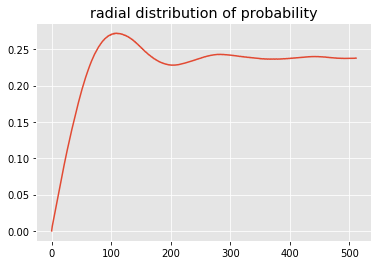

From outputs of PyMKS


In [14]:
## From PYMKS

r_val_pymks = corr.radialDistribution(reshaped_from_pymks)
plt.plot(r_val_pymks)
plt.title("radial distribution of probability")
plt.show()
print('From outputs of PyMKS')

# Getting radially distributed prob between 2 angles

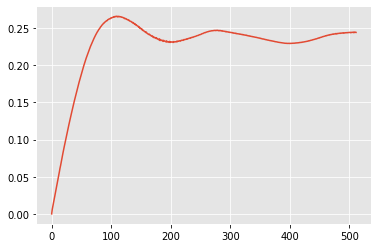

In [15]:
AngleChosenForOutput, radialProbDistribution =corr.giveAvailablePoints(cross,0,60,0)
plt.plot(radialProbDistribution)
plt.show()

Text(0.5, 1.0, 'Angles Chosen')

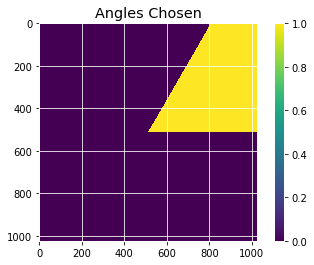

In [16]:
plt.imshow(AngleChosenForOutput)
plt.colorbar()
plt.title('Angles Chosen')

## Show radial distribution between 2 mirror regions

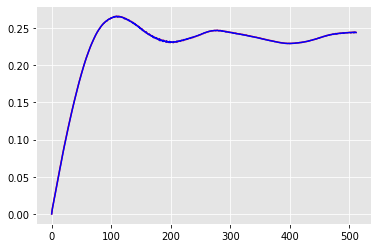

In [17]:
AngleChosenForOutput1, radialProbDistribution1 =corr.giveAvailablePoints(cross,180,240,0)
AngleChosenForOutput2, radialProbDistribution2 =corr.giveAvailablePoints(cross,0,60,0)

plt.plot(radialProbDistribution1,'r')
plt.plot(radialProbDistribution2,'b')
plt.show()


## Show radial distribution between 2 non-mirror regions

In [18]:
AngleChosenForOutput1, radialProbDistribution1 =corr.giveAvailablePoints(cross,0,60,0)
AngleChosenForOutput2, radialProbDistribution2 =corr.giveAvailablePoints(cross,30,90,0)


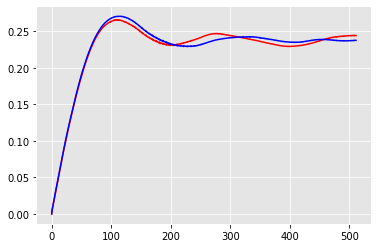

In [19]:
plt.plot(radialProbDistribution1,'r')
plt.plot(radialProbDistribution2,'b')
plt.show()

In [6]:
img_[250:500,250:500]

array([[ 0.00935646,  0.00978328,  0.01025236, ...,  0.00964186,
         0.01121639,  0.01235087],
       [ 0.00731143,  0.00762904,  0.00797329, ...,  0.01019771,
         0.01153013,  0.01238125],
       [ 0.00495754,  0.00515711,  0.00536683, ...,  0.01046921,
         0.01155793,  0.01214177],
       ...,
       [ 0.01269583,  0.01720273,  0.02070208, ..., -0.0267607 ,
        -0.02905142, -0.03165919],
       [ 0.01542322,  0.01991892,  0.02327884, ..., -0.02772504,
        -0.03001487, -0.03250261],
       [ 0.017774  ,  0.02219459,  0.0253649 , ..., -0.02668336,
        -0.02883015, -0.03101588]])